In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 시스템에 설치된 한글 폰트 경로를 지정하세요
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### 토픽모델링 대상 데이터만 

In [2]:
final_data=pd.read_csv('../department_standardized_data.csv')
final_data.drop(columns=['0','Unnamed: 0.1','Unnamed: 0','article_id_y'], inplace=True)

+ 인기 국가
+ 인기 학교
+ 봄학기 vs 가을학기 

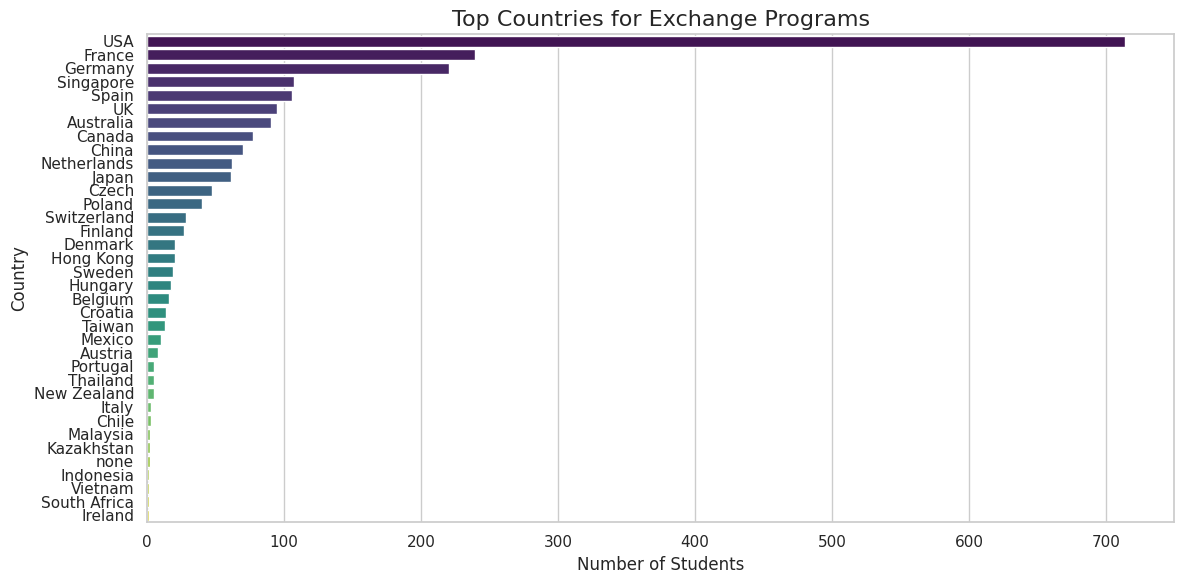

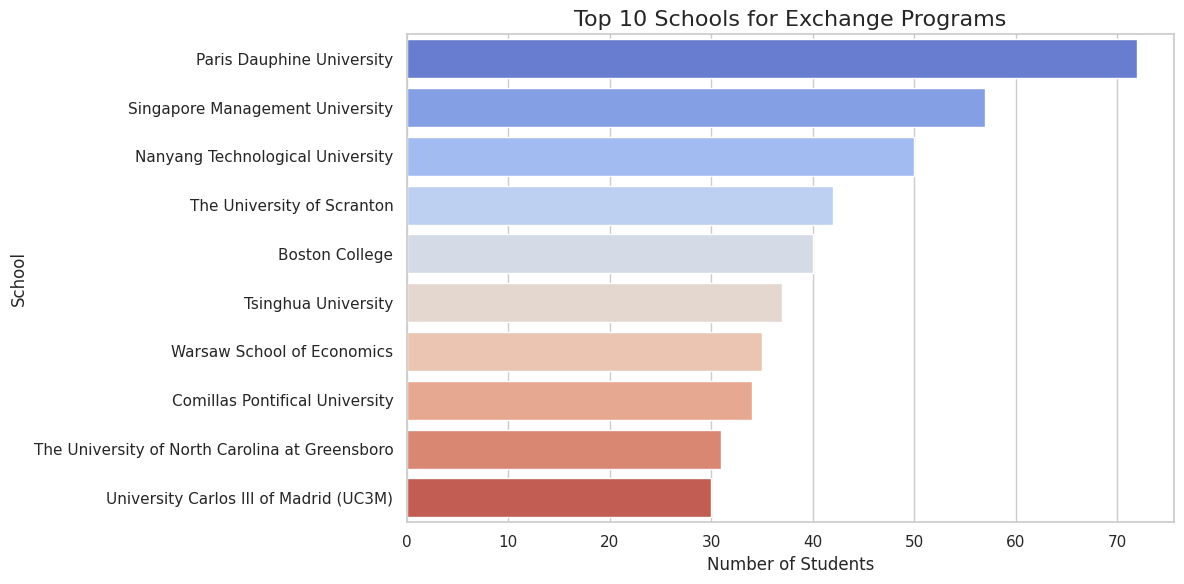

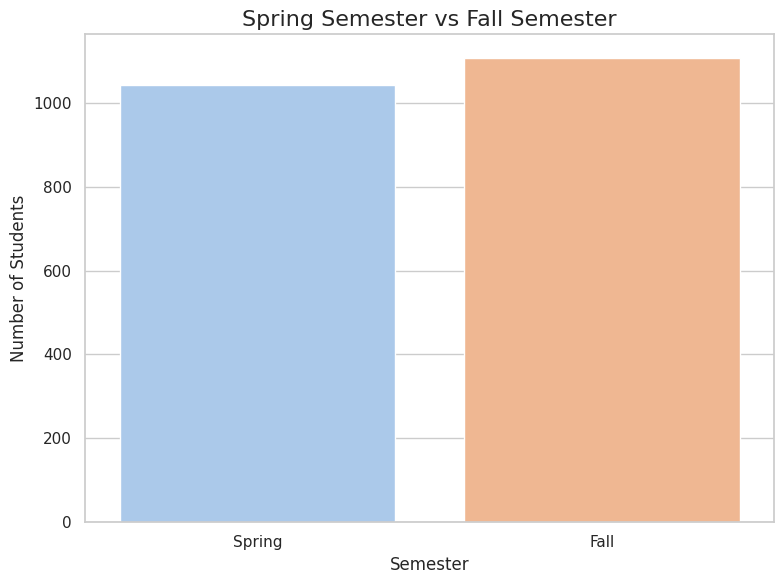

In [12]:


sns.set_theme(style="whitegrid")

# 인기 국가
country_counts = final_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Country', data=country_counts, palette='viridis',hue='Country',legend=False)
plt.title("Top Countries for Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 인기 학교
school_counts = final_data['School'].value_counts().reset_index()
school_counts.columns = ['School', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='School', data=school_counts.head(10), palette='coolwarm',hue='School',legend=False)
plt.title("Top 10 Schools for Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("School")
plt.tight_layout()
plt.show()


# 4.봄학기 vs 가을학기 
semester_counts =final_data['Semester'].value_counts().reset_index()
semester_counts.columns = ['Semester', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Semester', y='Count', data=semester_counts, palette='pastel',hue='Semester',legend=False)
plt.title("Spring Semester vs Fall Semester", fontsize=16)
plt.xlabel("Semester")
plt.ylabel("Number of Students")
plt.xticks(ticks=[0, 1], labels=['Spring', 'Fall'])
plt.tight_layout()
plt.show()

### 교환을 가장 많이 가는 학과

+ 복수전공 조합을 하나로 보고 count

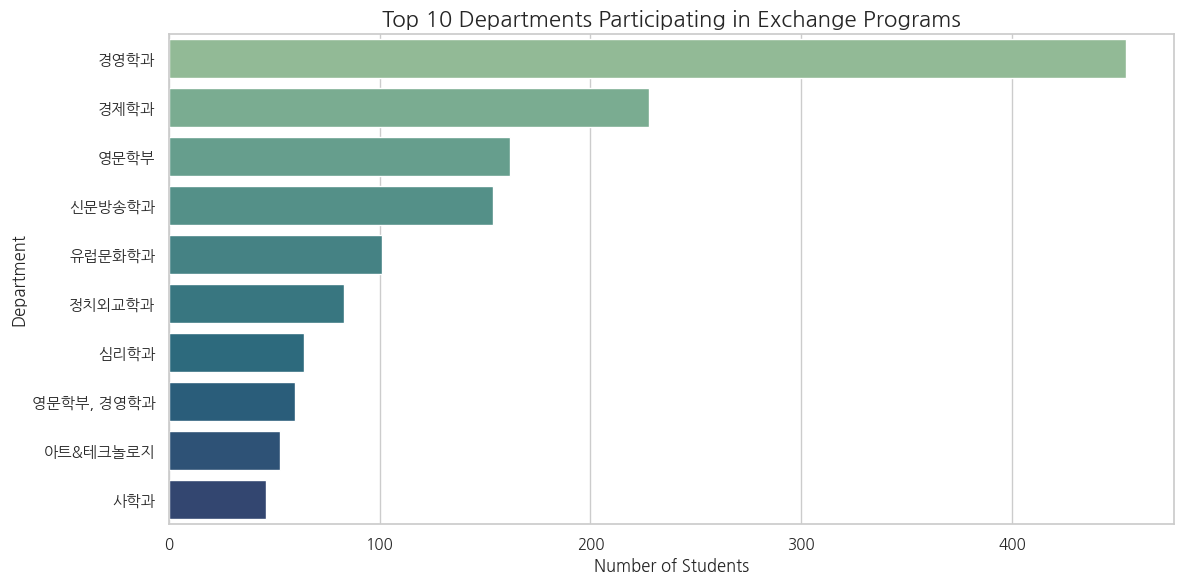

In [ ]:

#Major 1,2,3 결합-> combined_department
final_data['combined_department'] = final_data[['Major1', 'Major2', 'Major3']].apply(
    lambda x: ', '.join([str(major) for major in x if pd.notnull(major)]), axis=1
)

#복수전공 조합을 하나로 보고 count
department_counts = final_data['combined_department'].value_counts().reset_index()
department_counts.columns = ['combined_department', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='combined_department', data=department_counts.head(10), hue='combined_department', palette='crest',legend=False)
plt.title("Top 10 Departments Participating in Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

+ 복수전공 조합을 학과 각각으로 count

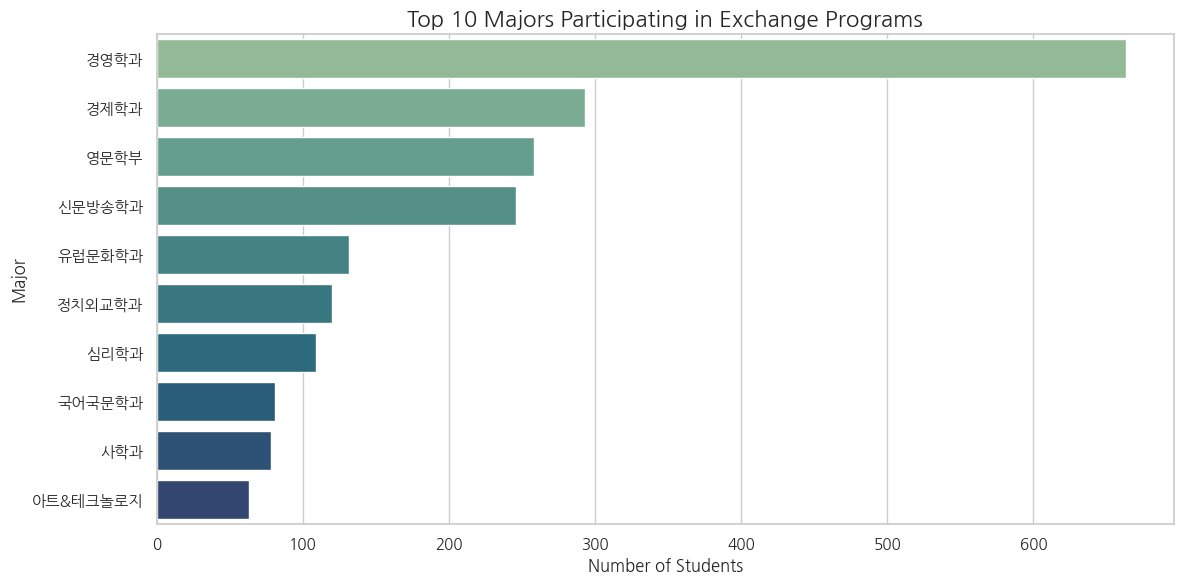

In [28]:

final_data['all_majors'] = final_data[['Major1', 'Major2', 'Major3']].apply(
    lambda x: ', '.join([str(major) for major in x if pd.notnull(major)]), axis=1
)
exploded_majors = final_data['all_majors'].str.split(', ').explode().reset_index(drop=True)

# 복수전공이어도 학과 각각 count
major_counts = exploded_majors.value_counts().reset_index()
major_counts.columns = ['Major', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Major', data=major_counts.head(10), palette='crest',hue='Major',legend=False)
plt.title("Top 10 Majors Participating in Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("Major")
plt.tight_layout()
plt.show()

### 교환을 가장 많이 가는 학과 조합 top3

Top 3 Double Major Combinations Among Exchange Students:
   Double Major Combination  Count
7                영문학부, 경영학과     60
18             신문방송학과, 경영학과     24
23                사학과, 경영학과     15


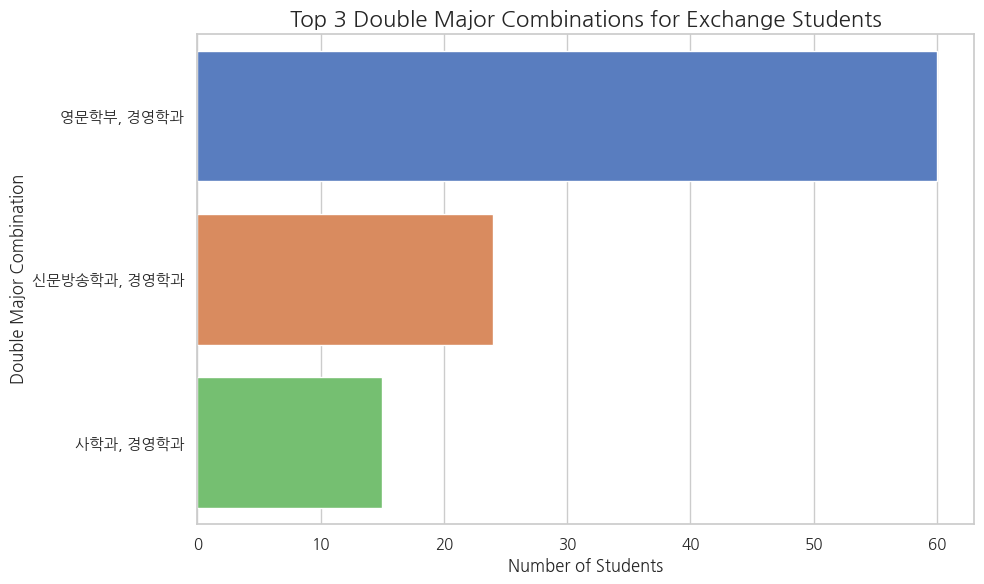

In [ ]:
double_major_counts = final_data['combined_department'].value_counts().reset_index()
double_major_counts.columns = ['Double Major Combination', 'Count']

# 복수전공 사람만 필터링 
double_major_counts = double_major_counts[double_major_counts['Double Major Combination'].str.contains(',')]

# top3
top_3_double_majors = double_major_counts.head(3)


print("Top 3 Double Major Combinations Among Exchange Students:")
print(top_3_double_majors)

# Visualize the top 3 double-major combinations
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count', 
    y='Double Major Combination', 
    data=top_3_double_majors, 
    palette='muted',
    hue='Double Major Combination',
    legend=False
)
plt.title("Top 3 Double Major Combinations for Exchange Students", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("Double Major Combination")
plt.tight_layout()
plt.show()

## 전체 데이터로 eda -topic_modeling data로만 했을 때와 큰 차이 없음 

In [20]:
full_data=pd.read_csv('../total_motivs_with_article_id.csv')


In [15]:
full_data.drop(columns=['0','Unnamed: 0.1','Unnamed: 0','article_id_y'], inplace=True)

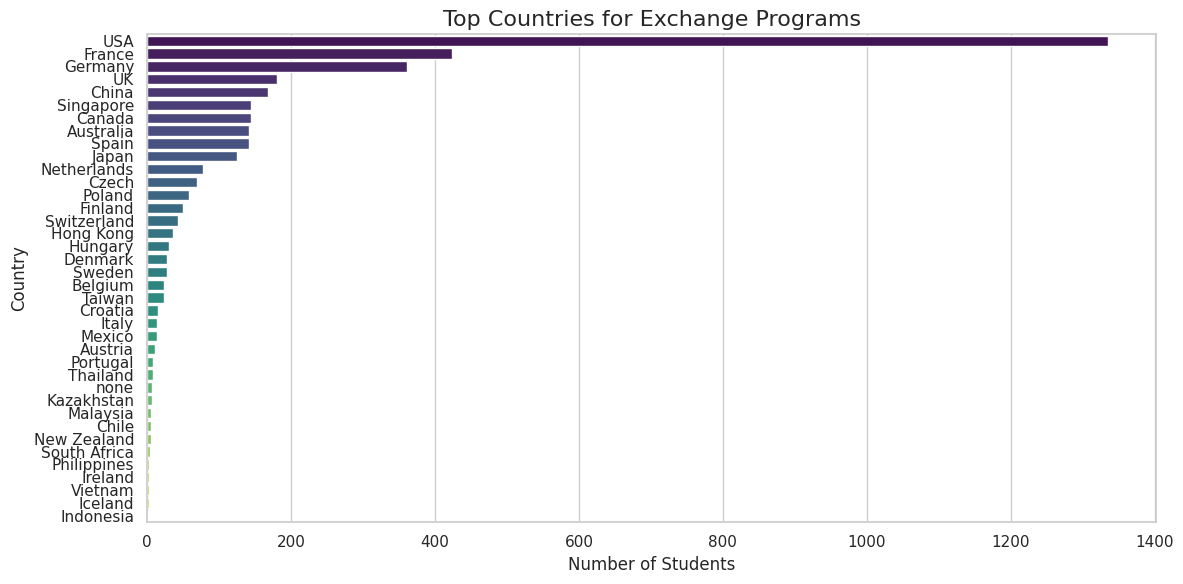

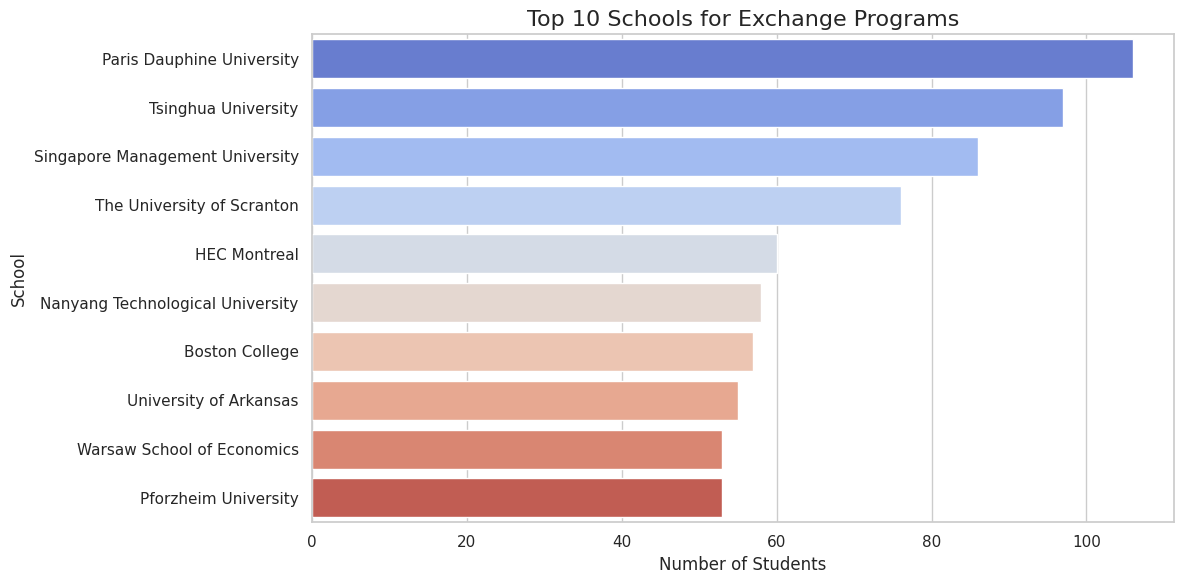

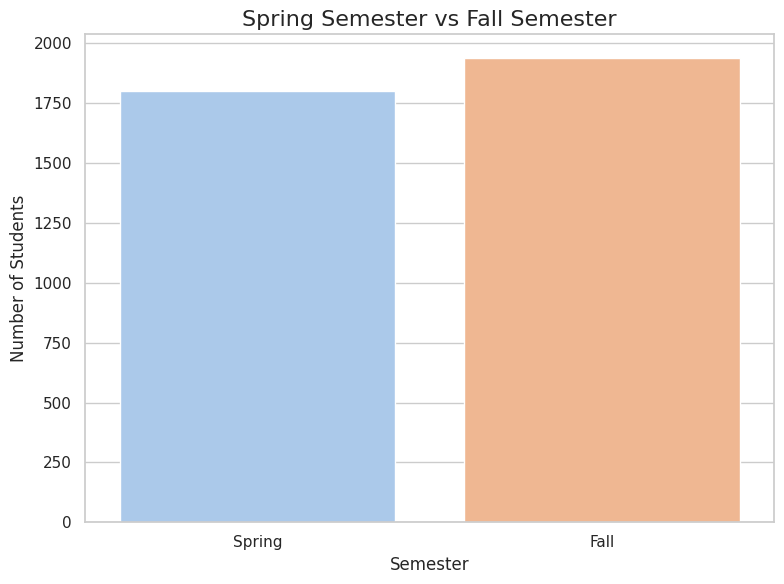

In [22]:
sns.set_theme(style="whitegrid")


country_counts = full_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Country', data=country_counts, palette='viridis',hue='Country',legend=False)
plt.title("Top Countries for Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


school_counts = full_data['School'].value_counts().reset_index()
school_counts.columns = ['School', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='School', data=school_counts.head(10), palette='coolwarm',hue='School',legend=False)
plt.title("Top 10 Schools for Exchange Programs", fontsize=16)
plt.xlabel("Number of Students")
plt.ylabel("School")
plt.tight_layout()
plt.show()


semester_counts =full_data['Semester'].value_counts().reset_index()
semester_counts.columns = ['Semester', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Semester', y='Count', data=semester_counts, palette='pastel',hue='Semester',legend=False)
plt.title("Spring Semester vs Fall Semester", fontsize=16)
plt.xlabel("Semester")
plt.ylabel("Number of Students")
plt.xticks(ticks=[0, 1], labels=['Spring', 'Fall'])
plt.tight_layout()
plt.show()